# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [132]:
# Add Matplotlib inline magic command
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityDataPath = 'Resources/city_data.csv'
rideDataPath = 'Resources/ride_data.csv'

# Read the City and Ride Data
cityDF = pd.read_csv(cityDataPath)
rideDF = pd.read_csv(rideDataPath)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyberDF = pd.merge(rideDF, cityDF, how='left', on=['city', 'city'])

# Display the data table for preview
pyberDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
# create data frames for each city type

urbanDF = pyberDF[pyberDF['type'] == 'Urban']
suburbanDF = pyberDF[pyberDF['type'] == 'Suburban']
ruralDF = pyberDF[pyberDF['type'] == 'Rural']

In [6]:
#  1. Get the total rides for each city type

urbanRideCount = urbanDF.groupby(['city']).count()['ride_id']
suburbanRideCount = suburbanDF.groupby(['city']).count()['ride_id']
ruralRideCount = ruralDF.groupby(['city']).count()['ride_id']

In [12]:
# 2. Get the total drivers for each city type

urbanTotalDrivers = urbanDF.groupby(['city']).mean()['driver_count']
suburbanTotalDrivers = suburbanDF.groupby(['city']).mean()['driver_count']
ruralTotalDrivers = ruralDF.groupby(['city']).mean()['driver_count']

In [7]:
#  3. Get the total amount of fares for each city type

urbanTotalFare = urbanDF.groupby(['city']).sum()['fare']
suburbanTotalFare = suburbanDF.groupby(['city']).sum()['fare']
ruralTotalFare = ruralDF.groupby(['city']).sum()['fare']

In [8]:
#  4. Get the average fare per ride for each city type. 

urbanAvgFare = urbanDF.groupby(['city']).mean()['fare']
suburbanAvgFare = suburbanDF.groupby(['city']).mean()['fare']
ruralAvgFare = ruralDF.groupby(['city']).mean()['fare']

In [34]:
# 5. Get the average fare per driver for each city type. 

urbanAvgFarePerDriver = urbanTotalFare.mean() / urbanTotalDrivers.mean()
suburbanAvgFarePerDriver = suburbanTotalFare.mean() / suburbanTotalDrivers.mean()
ruralAvgFarePerDriver = ruralTotalFare.mean() / ruralTotalDrivers.mean()

In [79]:
#  6. Create a PyBer summary DataFrame and format

pyberSummaryDF = pd.DataFrame({'type': ['Rural', 'Suburban', 'Urban'],
                               'Total Rides': [ruralRideCount.sum(), suburbanRideCount.sum(), urbanRideCount.sum()],
                              'Total Drivers': [ruralTotalDrivers.sum(), suburbanTotalDrivers.sum(), urbanTotalDrivers.sum()],
                              'Total Fares': [ruralTotalFare.sum(), suburbanTotalFare.sum(), urbanTotalFare.sum()],
                              'Average Fare per Ride': [ruralAvgFare.mean(), suburbanAvgFare.mean(), urbanAvgFare.mean()],
                              'Average Fare per Driver': [ruralAvgFarePerDriver, suburbanAvgFarePerDriver, urbanAvgFarePerDriver]})

# format columns

pyberSummaryDF['Total Drivers'] = pyberSummaryDF['Total Drivers'].map('{:.0f}'.format)
pyberSummaryDF['Total Fares'] = pyberSummaryDF['Total Fares'].map('${:.2f}'.format)
pyberSummaryDF['Average Fare per Ride'] = pyberSummaryDF['Average Fare per Ride'].map('${:.2f}'.format)
pyberSummaryDF['Average Fare per Driver'] = pyberSummaryDF['Average Fare per Driver'].map('${:.2f}'.format)

# format index

pyberSummaryDF = pyberSummaryDF.set_index('type')
pyberSummaryDF.index.name = None

pyberSummaryDF

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.64,$55.49
Suburban,625,490,$19356.33,$30.74,$39.50
Urban,1625,2405,$39854.38,$24.50,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [82]:
# 1. Read the merged DataFrame

pyberDF

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [99]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sumFaresDF = pyberDF.groupby(['date', 'type']).sum()[['fare']]
sumFaresDF

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [100]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sumFaresDF = sumFaresDF.reset_index()


In [101]:
sumFaresDF

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [119]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sumFaresPivot = sumFaresDF.pivot(index='date', columns='type', values='fare')
sumFaresPivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [166]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

sumFaresRange = sumFaresPivot.loc['2019-01-01':'2019-04-30']
sumFaresRange

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [167]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sumFaresRange.index = pd.to_datetime(sumFaresRange.index)

In [168]:
# 7. Check that the datatype for the index is datetime using df.info()
sumFaresRange.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [169]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sumFaresResampled = sumFaresRange.resample('W').sum()
sumFaresResampled

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


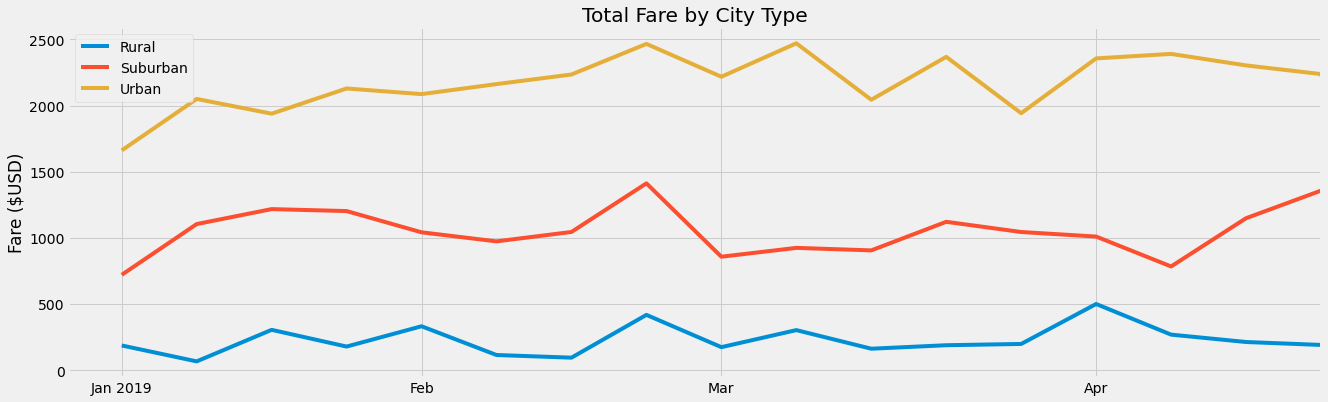

In [176]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# create multi-line chart

labels = ['Rural', 'Suburban', 'Urban']

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(sumFaresResampled, label=labels)

ax.legend()

# format chart

x_ticks = pd.to_datetime(['2019-01-06', '2019-02-03', '2019-03-03', '2019-04-07'])
ax.set_xlim(pd.to_datetime('2019-01-01'), pd.to_datetime('2019-04-28'))
ax.set_xticks(x_ticks, ['Jan 2019', 'Feb', 'Mar', 'Apr'])

ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')

plt.savefig("Analysis/PyBer_fare_summary.png")
